## import libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

## load data and get info

In [2]:
employee=pd.read_csv('/kaggle/input/employee-attrition/Dataset01-Employee_Attrition.csv')

In [3]:
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
employee.shape

(14999, 10)

In [5]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
employee.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
employee.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
employee.duplicated().sum()

3008

In [9]:
employee.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

## Analysis and Visualization

In [10]:
employee['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

<Axes: xlabel='left'>

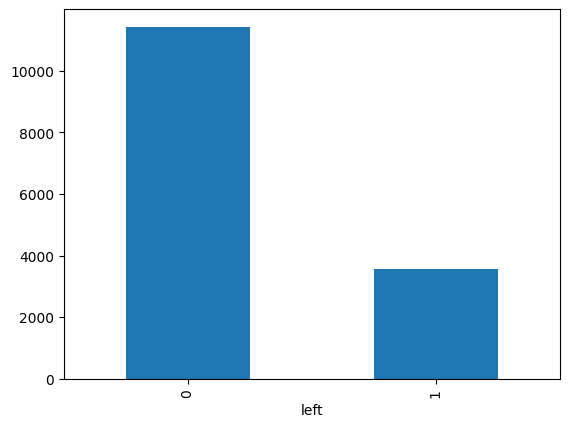

In [11]:
employee['left'].value_counts().plot(kind='bar')

In [12]:
pd.crosstab(employee.salary,employee.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

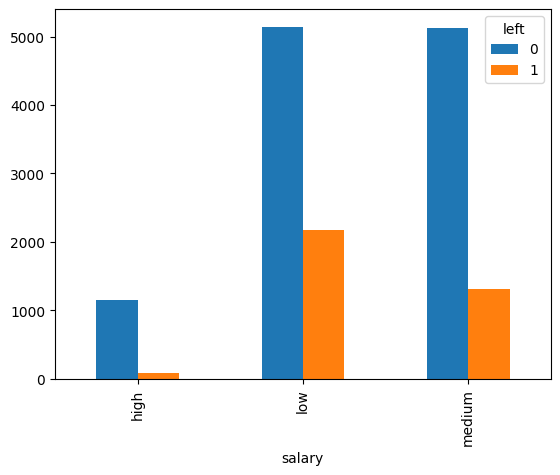

In [13]:
pd.crosstab(employee.salary,employee.left).plot(kind='bar')

In [14]:
pd.crosstab(employee.Department,employee.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Axes: xlabel='Department'>

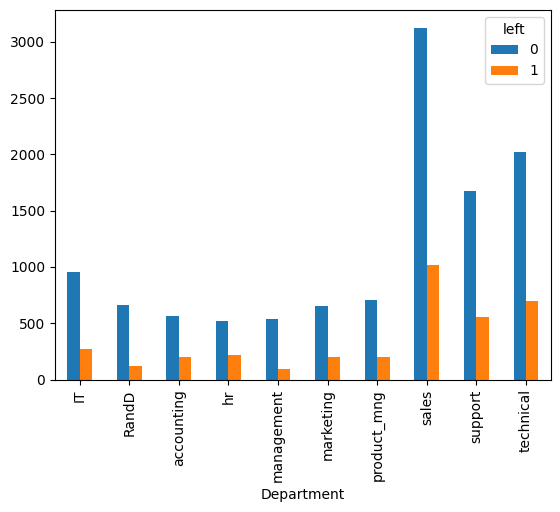

In [15]:
pd.crosstab(employee.Department,employee.left).plot(kind='bar')

## preprocessing

In [16]:
employee=employee.drop_duplicates()

In [17]:
employee.shape

(11991, 10)

In [18]:
employee['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [19]:
employee['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe with categorical data
Departmentt = pd.DataFrame({'Department': ['sales', 'technical','support','IT','RandD','product_mng','marketing','accounting','hr', 'management']})
salarys = pd.DataFrame({'salary': ['low', 'medium','high']})

print(f"Before Encoding the Data:\n\n{Departmentt}\n")
print(f"Before Encoding the Data:\n\n{salarys}\n")

Before Encoding the Data:

    Department
0        sales
1    technical
2      support
3           IT
4        RandD
5  product_mng
6    marketing
7   accounting
8           hr
9   management

Before Encoding the Data:

   salary
0     low
1  medium
2    high



In [21]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
employee['Department'] = le.fit_transform(employee['Department'])
employee['salary'] = le.fit_transform(employee['salary'])

In [22]:
Departmentt

,Department
0,sales
1,technical
2,support
3,IT
4,RandD
5,product_mng
6,marketing
7,accounting
8,hr
9,management


In [23]:
salarys

,salary
0,low
1,medium
2,high


In [24]:
employee.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500,5.847500,1.35500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018,5.989955,1.36213


<Axes: >

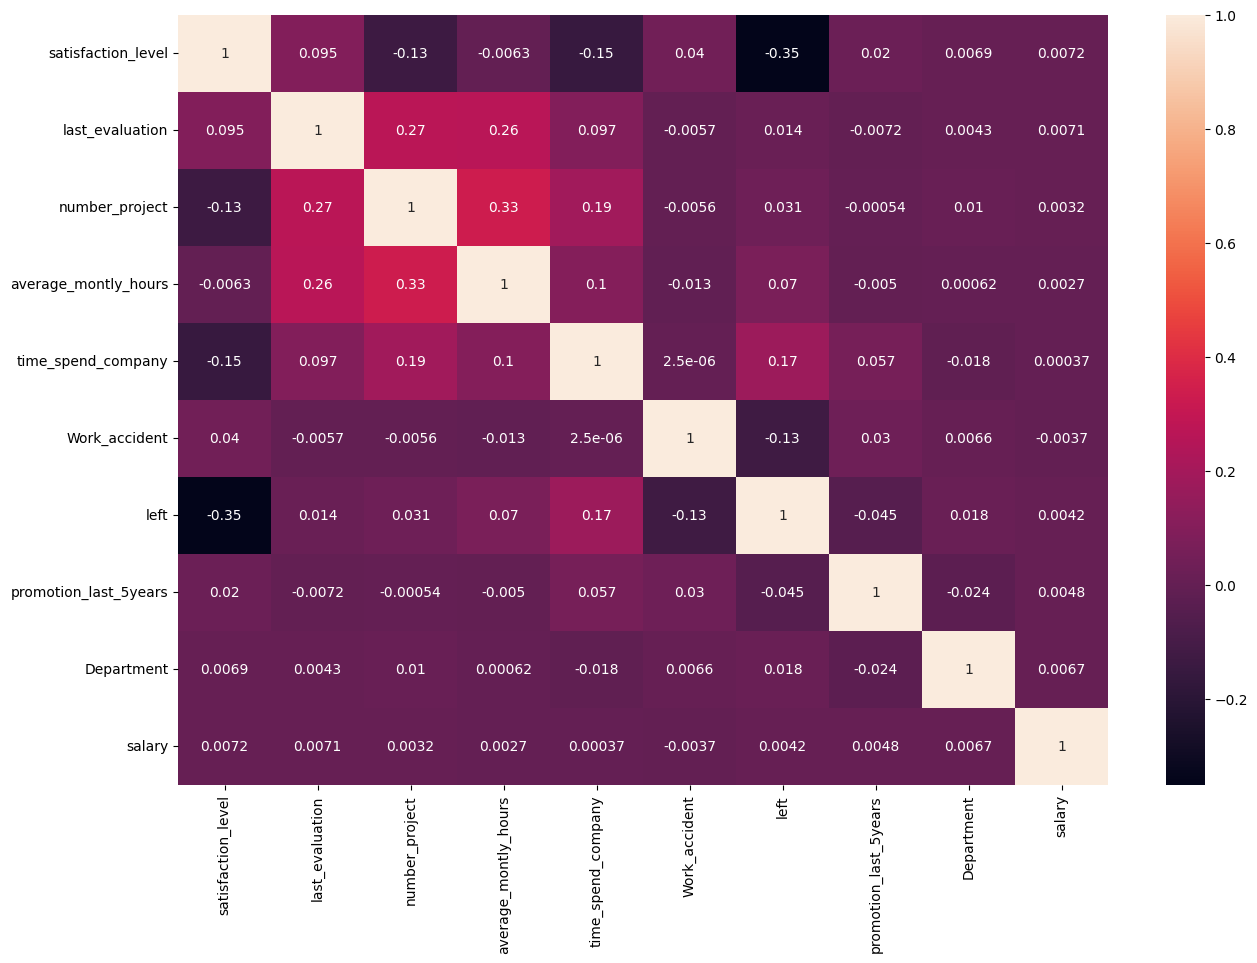

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(employee.corr(),annot=True)

## Build Model

In [26]:
x=employee[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [27]:
x=x.drop('salary',axis=1)

In [28]:
y=employee['left']

In [29]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0
...,...,...,...
11995,0.90,259,1
11996,0.74,266,1
11997,0.85,185,1
11998,0.33,172,1


In [30]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [32]:
x_train

,satisfaction_level,average_montly_hours,promotion_last_5years
696,0.10,291,0
6302,0.68,139,0
10555,0.75,140,0
2025,0.84,246,0
9431,0.52,163,0
...,...,...,...
4032,0.63,217,0
7268,0.95,255,0
5209,0.74,177,0
3784,0.80,225,0


In [33]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years
4524,0.78,180,0
5867,0.61,263,0
2597,0.56,172,0
3916,0.25,158,0
9391,0.62,153,0
...,...,...,...
3111,0.87,145,0
6168,0.82,198,0
5438,0.93,225,0
7866,0.69,139,0


In [34]:
model=RandomForestClassifier(n_estimators=10)

In [35]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [36]:
model.score(x_train, y_train)

0.9639282735613011

In [37]:
model.score(x_test, y_test)

0.9103793247186328

In [38]:
predict_test=model.predict(x_test)

In [39]:
predict_test

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
c=confusion_matrix(y_test,predict_test)

Text(95.72222222222221, 0.5, 'Truth')

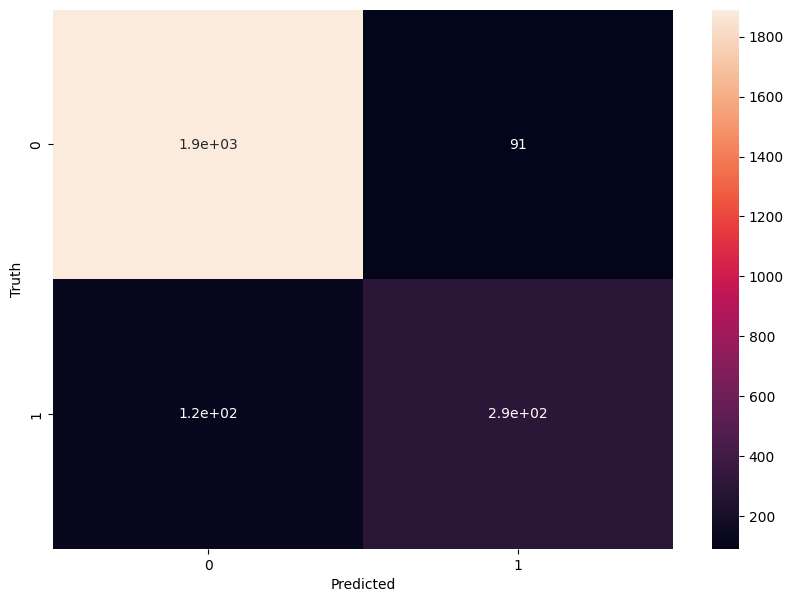

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(c, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
classification_report(y_test,predict_test)

'              precision    recall  f1-score   support\n\n           0       0.94      0.95      0.95      1981\n           1       0.76      0.70      0.73       418\n\n    accuracy                           0.91      2399\n   macro avg       0.85      0.83      0.84      2399\nweighted avg       0.91      0.91      0.91      2399\n'

In [43]:
accuracy_score(y_test,predict_test)

0.9103793247186328

In [44]:
predict_train=model.predict(x_train)

In [45]:
predict_train

array([1, 0, 0, ..., 0, 0, 0])

In [46]:
cm=confusion_matrix(y_train,predict_train)

Text(95.72222222222221, 0.5, 'Truth')

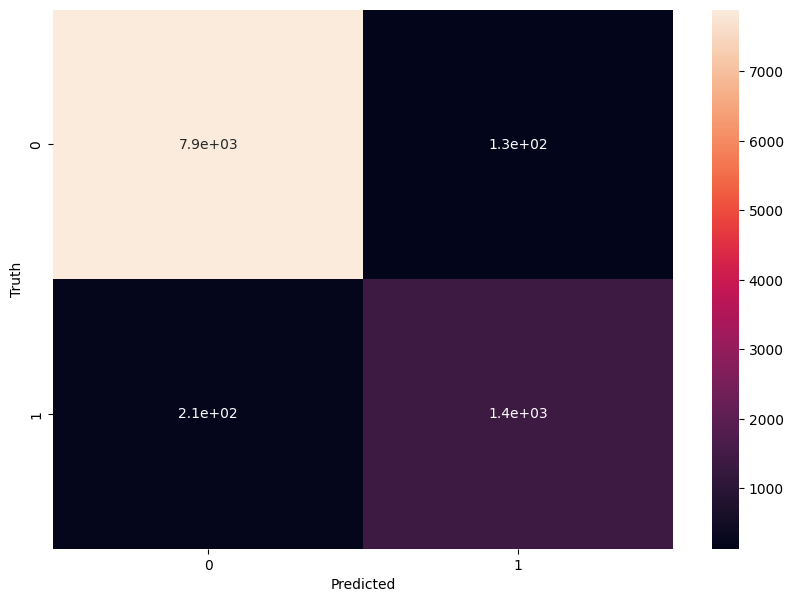

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
classification_report(y_train,predict_train)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98      8019\n           1       0.91      0.86      0.89      1573\n\n    accuracy                           0.96      9592\n   macro avg       0.94      0.92      0.93      9592\nweighted avg       0.96      0.96      0.96      9592\n'

In [49]:
accuracy_score(y_train,predict_train)

0.9639282735613011